# SI hyperparameters
Generate an epidemic with some unknown "true" $\lambda$, then try to infer it by doing a grid search and comparing the log-likelihood (negative Bethe free energy)

In [2]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, Plots, Printf, IndexedGraphs, Statistics, Random
using Base.Threads
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling MatrixProductBP [3d39929c-b583-45fa-b331-3f50b693a38a]
└ @ Base loading.jl:1662


In [3]:
nthreads()

10

In [4]:
include("../../telegram/notifications.jl")

default_tg_text (generic function with 1 method)

In [5]:
T = 10
N = 500
k = 4
gg = random_regular_graph(N, k)
g = IndexedGraph(gg)
t = SimpleGraph(prim_mst(gg))
g = IndexedGraph(t)
@assert is_connected(g)
λ_true = 0.2
ρ_true = 0.0
γ = 5/N;

In [6]:
sis_true = SIS(g, λ_true, ρ_true, T; γ)
X, _ = onesample(mpbp(sis_true));

In [7]:
lambdas = 0.15:0.01:0.3
rhos = [ρ_true]
f = fill!(lambdas*rhos', 0);

In [16]:
nobs = (T*N) * 10 ÷ 10
nobs = N

500

In [17]:
# @telegram "hyperparams" begin
    
@threads for i in eachindex(lambdas)
    println("## λ $i of ", length(lambdas))
    λ = lambdas[i]
    for j in eachindex(rhos)
        ρ = rhos[j]
        bp = mpbp(SIS(g, λ, ρ, T; γ))
        rng = MersenneTwister(0)
        draw_node_observations!(bp.ϕ, X, nobs; rng, last_time=true)
        iterate!(bp; maxiter=100, tol=1e-3, showprogress=false, svd_trunc=TruncBond(9))
        f[i,j] = bethe_free_energy(bp)
    end
end
    
# end

## λ 5 of 16
## λ 3 of 16
## λ 13 of 16
## λ 15 of 16
## λ 16 of 16
## λ 11 of 16
## λ 1 of 16
## λ 14 of 16
## λ 7 of 16
## λ 9 of 16
## λ 6 of 16
## λ 8 of 16
## λ 4 of 16
## λ 12 of 16
## λ 10 of 16
## λ 2 of 16


LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:461[24m[39m[90m [inlined][39m
      [2] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:469[24m[39m[90m [inlined][39m
      [3] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4marray.jl:378[24m[39m[90m [inlined][39m
      [4] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:795[24m[39m[90m [inlined][39m
      [5] [0m[1m_unsafe_getindex[22m[0m[1m([22m::[0mIndexLinear, ::[0mMatrix[90m{Float64}[39m, ::[0mBase.Slice[90m{Base.OneTo{Int64}}[39m, ::[0mUnitRange[90m{Int64}[39m[0m[1m)[22m
    [90m    @ [39m[90mBase[39m [90m./[39m[90m[4mmultidimensional.jl:887[24m[39m
      [6] [0m[1m_getindex[22m
    [90m    @ [39m[90m./[39m[90m[4mmultidimensional.jl:875[24m[39m[90m [inlined][39m
      [7] [0m[1mgetindex[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:1241[24m[39m[90m [inlined][39m
      [8] [0m[1msweep_LtoR![22m[0m[1m([22m[90mC[39m::[0mMPEM2[90m{2, 10, Float64}[39m; [90msvd_trunc[39m::[0mTruncThresh[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.MPEMs[39m [90m~/MatrixProductBP/src/[39m[90m[4mmpem2.jl:104[24m[39m
      [9] [0m[1mf_bp_sis[22m[0m[1m([22m[90mA[39m::[0mVector[90m{MPEM2{2, 10, Float64}}[39m, [90mpᵢ⁰[39m::[0mVector[90m{Float64}[39m, [90mwᵢ[39m::[0mVector[90m{MatrixProductBP.Models.SISFactor{Float64}}[39m, [90mϕᵢ[39m::[0mVector[90m{Vector{Float64}}[39m, [90mψₙᵢ[39m::[0mVector[90m{Vector{Matrix{Float64}}}[39m, [90mj[39m::[0mInt64; [90msvd_trunc[39m::[0mTruncBond[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.Models[39m [90m~/MatrixProductBP/src/Models/sis/[39m[90m[4msis_bp.jl:60[24m[39m
     [10] [0m[1m_onebpiter![22m[0m[1m([22m[90mbp[39m::[0mMPBP[90m{2, 10, Float64, MatrixProductBP.Models.SISFactor{Float64}}[39m, [90mi[39m::[0mInt64, [90mf_bp[39m::[0mtypeof(MatrixProductBP.Models.f_bp_sis); [90msvd_trunc[39m::[0mTruncBond[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP[39m [90m~/MatrixProductBP/src/[39m[90m[4mmpbp.jl:97[24m[39m
     [11] [0m[1m#onebpiter!#115[22m
    [90m    @ [39m[90m~/MatrixProductBP/src/Models/sis/[39m[90m[4msis_bp.jl:180[24m[39m[90m [inlined][39m
     [12] [0m[1miterate![22m[0m[1m([22m[90mbp[39m::[0mMPBP[90m{2, 10, Float64, MatrixProductBP.Models.SISFactor{Float64}}[39m; [90mmaxiter[39m::[0mInt64, [90msvd_trunc[39m::[0mTruncBond, [90mshowprogress[39m::[0mBool, [90mcb[39m::[0mCB_BP[90m{ProgressMeter.ProgressUnknown}[39m, [90mtol[39m::[0mFloat64, [90mlogz_msg[39m::[0mVector[90m{Float64}[39m, [90mnodes[39m::[0mVector[90m{Int64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP[39m [90m~/MatrixProductBP/src/[39m[90m[4mmpbp.jl:147[24m[39m
     [13] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m./[39m[90m[4mIn[17]:11[24m[39m[90m [inlined][39m
     [14] [0m[1m(::var"#101#threadsfor_fun#9"{var"#101#threadsfor_fun#8#10"{Base.OneTo{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[36mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:84[24m[39m
     [15] [0m[1m#101#threadsfor_fun[22m
    [90m    @ [39m[90m./[39m[90m[4mthreadingconstructs.jl:51[24m[39m[90m [inlined][39m
     [16] [0m[1m(::Base.Threads.var"#1#2"{var"#101#threadsfor_fun#9"{var"#101#threadsfor_fun#8#10"{Base.OneTo{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:30[24m[39m

Inference of hyperparameters for one realization of an epidemic with N=500, T=10, 
    500 random observations


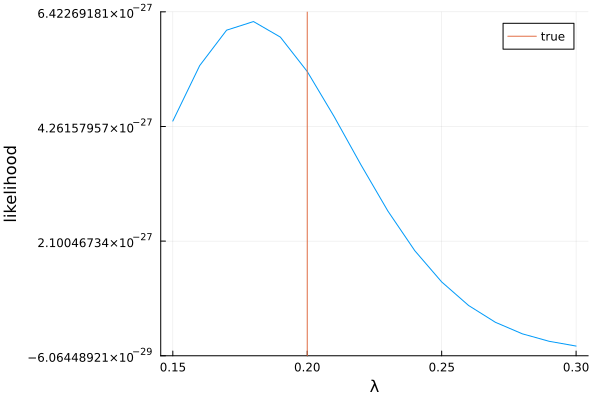

In [18]:
println("Inference of hyperparameters for one realization of an epidemic with N=$N, T=$T, 
    $nobs random observations")
plot(lambdas, exp.(-f)[:], xlabel="λ", ylabel="likelihood", label="")
vline!([λ_true], label="true")